# Marc Wharton HW 4

Each problem is worth 20 points.

In [399]:
#import packages
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression

### Problem 1
Upload the Auto data set. Remove the "name" column. The "mpg" variable is a dependent variable here. Use statmodels formula package to train a Multiple Linear Regression model using all the independent variables. Display the summary. Find and remove a variable with the highest p-value from the list of independent variables in the summary of the model. Now create a new model with this new list of variables and display the summary. Repeat this process by picking one variable with the highest p-value at a time and making a new model until you run out of the variable with a p-value of more than $0.05$ in summary. Report the summary of the final model together with $R^2$ and adjusted $R^2$.

In [282]:
auto=pd.read_csv('Auto.csv') # Uploading the Auto data set.
auto=auto.drop(columns=['name']) # Dropping the 'name' column.
i=auto[auto.horsepower == '?'].index # In the horsepower column there were values of '?'.
auto=auto.drop(i) # Dropping the values that cannot be converted to numeric.
auto['horsepower']=pd.to_numeric(auto['horsepower'], downcast='float') # Converting horsepower to numeric.

In [283]:
cols0=['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'year', 'origin']
x0=sm.add_constant(auto[cols0])
y=auto.mpg
model0=sm.OLS(y,x0).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          2.04e-139
Time:                        16:12:29   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [284]:
cols1=['cylinders', 'displacement', 'horsepower', 'weight', 'year', 'origin'] # Removing acceleration variable.
x1=sm.add_constant(auto[cols1])
model1=sm.OLS(y,x1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     294.6
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          1.58e-140
Time:                        16:12:29   Log-Likelihood:                -1023.8
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     385   BIC:                             2089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -15.5635      4.175     -3.728      0.000     -23.773      -7.354
cylinders       -0.5067      0.323     -1.570      0.117      -1.141       0.128
displacement     0.0193      0.007      2.579      0.010       0.005       0.034
horsepower      -0.0239      0.011     -2.205      0.028      -0.045      -0.003
weight          -0.0062      0.001    -10.883      0.000      -0.007      -0.005
year             0.7475      0.051     14.717      0.000       0.648       0.847
origin           1.4282      0.278      5.138      0.000       0.882       1.975
==============================================================================
Omnibus:                       35.376   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.123
Skew:                           0.559   Prob(JB):                     3.24e-14
Kurtosis:                       4.597   Cond. No.                     7.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [285]:
cols2=['displacement', 'horsepower', 'weight', 'year', 'origin'] # Removing cylinders variable.
x2=sm.add_constant(auto[cols2])
model2=sm.OLS(y,x2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     351.7
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          2.73e-141
Time:                        16:12:30   Log-Likelihood:                -1025.1
No. Observations:                 392   AIC:                             2062.
Df Residuals:                     386   BIC:                             2086.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.6939      4.120     -4.051      0.000     -24.795      -8.592
displacement     0.0114      0.006      2.054      0.041       0.000       0.022
horsepower      -0.0219      0.011     -2.033      0.043      -0.043      -0.001
weight          -0.0063      0.001    -11.124      0.000      -0.007      -0.005
year             0.7484      0.051     14.707      0.000       0.648       0.848
origin           1.3853      0.277      4.998      0.000       0.840       1.930
==============================================================================
Omnibus:                       34.200   Durbin-Watson:                   1.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.468
Skew:                           0.552   Prob(JB):                     2.01e-13
Kurtosis:                       4.536   Cond. No.                     7.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I only had to remove two variables, acceleration, and cylinders. Of the remaining variables, displacement, and horsepower were just below the $0.05$ threshold at $0.041$, and $0.043$ respectively. The $R^2$ is $0.820$, and the adjusted $R^2$ is $0.818$.

### Problem 2
Filter the original data set only with the significant variable you found in problem 1 and the "mpg" variable. Divide the data set into training and testing with (a)80 % by 20%,  (b) 75%, 25%, and (c) 70%, 30%. Train 3 new models using  the above 3 training data. Report $R^2$, Adjusted $R^2$, MSE, MAE for these 3 models for training and testing data. Compare and comment on which model you will pick and why.

# (a)

In [340]:
xa=auto[cols2]
xatrain, xatest, yatrain, yatest = train_test_split(xa, y, test_size=0.2,random_state=33)
modela=sm.OLS(yatrain,sm.add_constant(xatrain)).fit()
modela.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     282.1
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          1.78e-112
Time:                        16:14:23   Log-Likelihood:                -819.33
No. Observations:                 313   AIC:                             1651.
Df Residuals:                     307   BIC:                             1673.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.9059      4.603     -4.108      0.000     -27.962      -9.849
displacement     0.0079      0.006      1.270      0.205      -0.004       0.020
horsepower      -0.0137      0.012     -1.140      0.255      -0.037       0.010
weight          -0.0063      0.001    -10.023      0.000      -0.008      -0.005
year             0.7765      0.057     13.606      0.000       0.664       0.889
origin           1.3421      0.316      4.248      0.000       0.720       1.964
==============================================================================
Omnibus:                       32.461   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.063
Skew:                           0.597   Prob(JB):                     1.49e-13
Kurtosis:                       4.761   Cond. No.                     7.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### $R^2$

In [287]:
yatestpred =modela.predict(sm.add_constant(xatest))
r2_score(yatest, yatestpred)

0.8104166393439394

In [288]:
xatest.shape

(79, 5)

#### adjusted $R^2$

In [289]:
adjrsquareda = 1-(1-0.8104166393439394)* (79-1)/(79-5-1)
adjrsquareda 

0.7974314776551681

#### MSE

In [290]:
yatrainpred = modela.predict(sm.add_constant(xatrain))
metrics.mean_squared_error(yatrainpred, yatrain)

10.994913798411238

In [291]:
metrics.mean_squared_error(yatestpred, yatest)

10.864793052239545

#### MAE

In [292]:
metrics.mean_absolute_error(yatrainpred, yatrain)

2.469136700412207

In [293]:
metrics.mean_absolute_error(yatestpred, yatest)

2.6423558337721045

# (b)

In [294]:
xb=auto[cols2]
xbtrain, xbtest, ybtrain, ybtest = train_test_split(xb, y, test_size=0.25,random_state=33)
modelb=sm.OLS(ybtrain,sm.add_constant(xbtrain)).fit()
modelb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     285.2
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          2.85e-109
Time:                        16:12:35   Log-Likelihood:                -762.84
No. Observations:                 294   AIC:                             1538.
Df Residuals:                     288   BIC:                             1560.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.9016      4.649     -3.635      0.000     -26.052      -7.751
displacement    -0.0008      0.007     -0.115      0.908      -0.014       0.012
horsepower      -0.0027      0.012     -0.220      0.826      -0.027       0.022
weight          -0.0058      0.001     -9.024      0.000      -0.007      -0.005
year             0.7357      0.058     12.687      0.000       0.622       0.850
origin           1.4417      0.318      4.531      0.000       0.815       2.068
==============================================================================
Omnibus:                       37.610   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.471
Skew:                           0.682   Prob(JB):                     6.74e-17
Kurtosis:                       5.054   Cond. No.                     7.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### $R^2$

In [295]:
ybtestpred =modelb.predict(sm.add_constant(xbtest))
r2_score(ybtest, ybtestpred)

0.763533539261172

In [296]:
xbtest.shape

(98, 5)

#### adjusted $R^2$

In [297]:
adjrsquaredb = 1-(1-0.763533539261172)* (98-1)/(98-5-1)
adjrsquaredb

0.75068210117754

#### MSE

In [298]:
ybtrainpred = modelb.predict(sm.add_constant(xbtrain))
metrics.mean_squared_error(ybtrainpred, ybtrain)

10.501723724433026

In [299]:
metrics.mean_squared_error(ybtestpred, ybtest)

13.092827110827415

#### MAE

In [300]:
metrics.mean_absolute_error(ybtrainpred, ybtrain)

2.38374400463802

In [301]:
metrics.mean_absolute_error(ybtestpred, ybtest)

2.818807012685162

# (c)

In [302]:
xc=auto[cols2]
xctrain, xctest, yctrain, yctest = train_test_split(xc, y, test_size=0.30,random_state=33)
modelc=sm.OLS(yctrain,sm.add_constant(xctrain)).fit()
modelc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     269.3
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          2.81e-102
Time:                        16:12:39   Log-Likelihood:                -709.75
No. Observations:                 274   AIC:                             1431.
Df Residuals:                     268   BIC:                             1453.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2090      4.863     -3.539      0.000     -26.783      -7.635
displacement    -0.0007      0.007     -0.101      0.920      -0.014       0.013
horsepower      -0.0024      0.013     -0.192      0.848      -0.027       0.022
weight          -0.0058      0.001     -8.685      0.000      -0.007      -0.004
year             0.7332      0.060     12.214      0.000       0.615       0.851
origin           1.6113      0.331      4.863      0.000       0.959       2.264
==============================================================================
Omnibus:                       33.997   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.950
Skew:                           0.635   Prob(JB):                     3.92e-16
Kurtosis:                       5.145   Cond. No.                     7.67e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.67e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### $R^2$

In [303]:
yctestpred =modelc.predict(sm.add_constant(xctest))
r2_score(yctest, yctestpred)

0.7673698216025402

In [304]:
xctest.shape

(118, 5)

#### adjusted $R^2$

In [305]:
adjrsquaredc = 1-(1-0.7673698216025402)* (118-1)/(118-5-1)
adjrsquaredc

0.756984545781225

#### MSE

In [306]:
yctrainpred = modelc.predict(sm.add_constant(xctrain))
metrics.mean_squared_error(yctrainpred, yctrain)

10.410100821734915

In [307]:
metrics.mean_squared_error(yctestpred, yctest)

13.049941025661791

#### MAE

In [308]:
metrics.mean_absolute_error(yctrainpred, yctrain)

2.351727592160397

In [309]:
metrics.mean_absolute_error(yctestpred, yctest)

2.8182506093762147

I would pick model (a) because its $R^2$ value is the only one above $0.8$.

### Problem 3
Repeat problem 2 using the scikit-learn package. More information about the scikit-learn package can be found here.
https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares. 

# (a)

In [310]:
LR = LinearRegression() # Creating a LinearRegression class object.
LR.fit(xatrain,yatrain) # From what I can tell, this should use the same train and test variables.

LinearRegression()

#### $R^2$

In [311]:
ya1testpred = LR.predict(xatest) # Here is where the model's variable differs.
r2_score(yatest, ya1testpred)

0.8104166393439397

#### adjusted $R^2$

In [312]:
adjrsquareda1 = 1-(1-0.8104166393439397)* (79-1)/(79-5-1)
adjrsquareda1

0.7974314776551684

#### MSE

In [313]:
ya1trainpred = LR.predict(xatrain)
metrics.mean_squared_error(ya1trainpred, yatrain)

10.994913798411242

In [314]:
metrics.mean_squared_error(ya1testpred, yatest)

10.864793052239522

#### MAE

In [315]:
metrics.mean_absolute_error(ya1trainpred, yatrain)

2.4691367004122102

In [316]:
metrics.mean_absolute_error(ya1testpred, yatest)

2.642355833772102

# (b)

In [317]:
LR.fit(xbtrain,ybtrain)

LinearRegression()

#### $R^2$

In [318]:
yb1testpred = LR.predict(xbtest)
r2_score(ybtest, yb1testpred)

0.7635335392611726

#### adjusted $R^2$

In [319]:
adjrsquaredb1 = 1-(1-0.7635335392611726)* (98-1)/(98-5-1)
adjrsquaredb1

0.7506821011775406

#### MSE

In [320]:
yb1trainpred = LR.predict(xbtrain)
metrics.mean_squared_error(yb1trainpred, ybtrain)

10.501723724433026

In [321]:
metrics.mean_squared_error(yb1testpred, ybtest)

13.092827110827377

#### MAE

In [322]:
metrics.mean_absolute_error(yb1trainpred, ybtrain)

2.3837440046380185

In [323]:
metrics.mean_absolute_error(yb1testpred, ybtest)

2.818807012685152

# (c)

In [324]:
LR.fit(xctrain,yctrain)

LinearRegression()

#### $R^2$

In [325]:
yc1testpred = LR.predict(xctest)
r2_score(yctest, yc1testpred)

0.7673698216025403

#### adjusted $R^2$

In [326]:
adjrsquaredc1 = 1-(1-0.7673698216025403)* (118-1)/(118-5-1)
adjrsquaredc1

0.7569845457812252

#### MSE

In [327]:
yc1trainpred = LR.predict(xctrain)
metrics.mean_squared_error(yc1trainpred, yctrain)

10.410100821734918

In [328]:
metrics.mean_squared_error(yc1testpred, yctest)

13.04994102566179

#### MAE

In [329]:
metrics.mean_absolute_error(yc1trainpred, yctrain)

2.3517275921603966

In [330]:
metrics.mean_absolute_error(yc1testpred, yctest)

2.8182506093762147

Agian, I would pick model (a) because its $R^2$ value is the only one above $0.8$.

### Problem 4
Train a Multiple Linear Regression model using data in problem 2 ( only the data with 80%, 20% rule) from scratch. This means that you will not be using statmodels, scikit-learn package, or any other package with regression function. You can adapt some codes from here
https://github.com/tugot17/Linear-Regression-From-Scratch/blob/master/LinearRegression.ipynb. Compare $R^2$, Adjusted $R^2$, MSE and MAE for this model and previous two models.

In [358]:
x=auto[cols2]
# Scale the dataset. 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
Xtrain, Xtest, Ytrain, Ytest = train_test_split( x, y, test_size = 0.2,random_state=33)

In [338]:
#calculate cost.
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

#Gradient Descent.
def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost at epoch",epoch,"is:",cost)
        
    return w, b, cost_list

In [359]:
# Calculating weights and bias.
w, b, c= GradientDescent(Xtrain, Ytrain, np.zeros(Xtrain.shape[1]), 0, 0.002,epochs=15000)

Cost at epoch 0 is: 300.5601057186591
Cost at epoch 1500 is: 6.843203209840416
Cost at epoch 3000 is: 5.856055697014246
Cost at epoch 4500 is: 5.715979130169213
Cost at epoch 6000 is: 5.635355692647103
Cost at epoch 7500 is: 5.58663275461045
Cost at epoch 9000 is: 5.556322189904492
Cost at epoch 10500 is: 5.536965431779915
Cost at epoch 12000 is: 5.524320927340872
Cost at epoch 13500 is: 5.5159051959133425


In [375]:
# Predicting labels with the calculated weights and biases.
def predict(X, w, b):
    return X.dot(w) + b

y_testpred = predict(Xtest, w, b)

y_trainpred = predict(Xtrain, w, b)

# Calculating the R² accuracy of our model.
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2

r2score(y_testpred, Ytest)

0.808154350799573

In [388]:
# Calculating the adjusted R² of our model.
adjr2 = 1-(1-0.808154350799573)* (Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)
adjr2

0.7950142378406396

In [370]:
# Calculating MSE of our model.
def MSE(y_pred, y):
    mse=1/(y_pred.size)*np.sum((y_pred - y) ** 2)
    return mse

MSE(y_testpred,Ytest)

10.994442071931642

In [376]:
MSE(y_trainpred,Ytrain)

11.020446260665851

In [374]:
# Calculating MAE of our model.
def MAE(y_pred, y):
    mae=1/(y_pred.size)*np.sum(abs(y-y.mean()))
    return mae

MAE(y_testpred,Ytest)

6.4839929498477815

In [377]:
MAE(y_trainpred,Ytrain)

6.559793404035968

# Comparisons

#### $R^2$

In [378]:
# Previous R^2
r2_score(yatest, yatestpred)

0.8104166393439394

In [379]:
# Scratch R^2
r2score(y_testpred, Ytest)

0.808154350799573

#### Adjusted $R^2$

In [389]:
# Previous adj R2.
adjrsquareda = 1-(1-0.8104166393439394)* (79-1)/(79-5-1)
adjrsquareda 

0.7974314776551681

In [390]:
# Scratch adj R2.
adjr2 = 1-(1-0.808154350799573)* (Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)
adjr2

0.7950142378406396

#### MSE

In [391]:
# Previous MSE's.
yatrainpred = modela.predict(sm.add_constant(xatrain))
metrics.mean_squared_error(yatrainpred, yatrain)

10.994913798411238

In [392]:
metrics.mean_squared_error(yatestpred, yatest)

10.864793052239545

In [393]:
# Scratch MSE's.
MSE(y_testpred,Ytest)

10.994442071931642

In [394]:
MSE(y_trainpred,Ytrain)

11.020446260665851

#### MAE

In [395]:
# Previous MAE's.
metrics.mean_absolute_error(yatrainpred, yatrain)

2.469136700412207

In [396]:
metrics.mean_absolute_error(yatestpred, yatest)

2.6423558337721045

In [397]:
# Scratch MAE's.
MAE(y_testpred,Ytest)

6.4839929498477815

In [398]:
MAE(y_trainpred,Ytrain)

6.559793404035968

### Problem 5
Make two plots ( Residuals vs Fitted, and Normal QQ-plot for the model in problem 4. Some examples are here.
https://emredjan.medium.com/emulating-r-regression-plots-in-python-43741952c034.

In [401]:
resids=Ytest-y_testpred

# Residuals vs Fitted

C:\Users\march\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Residuals')

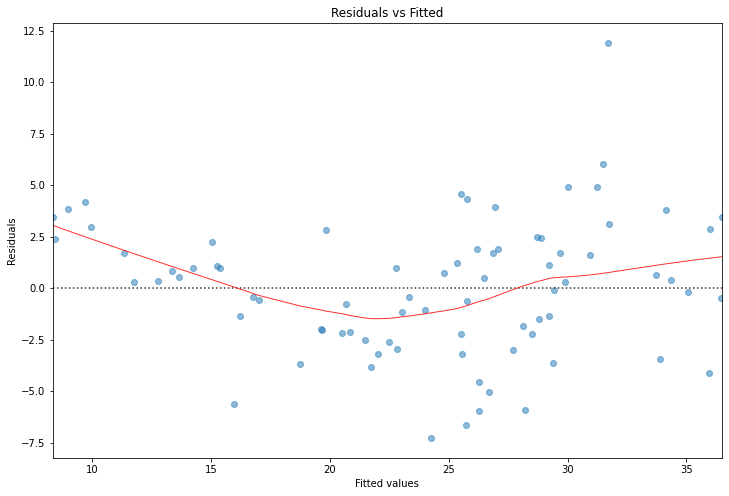

In [402]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(y_testpred, resids, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

In [403]:
from sklearn import preprocessing

In [410]:
norm_resids = preprocessing.normalize([resids])

# Normal QQ-plot

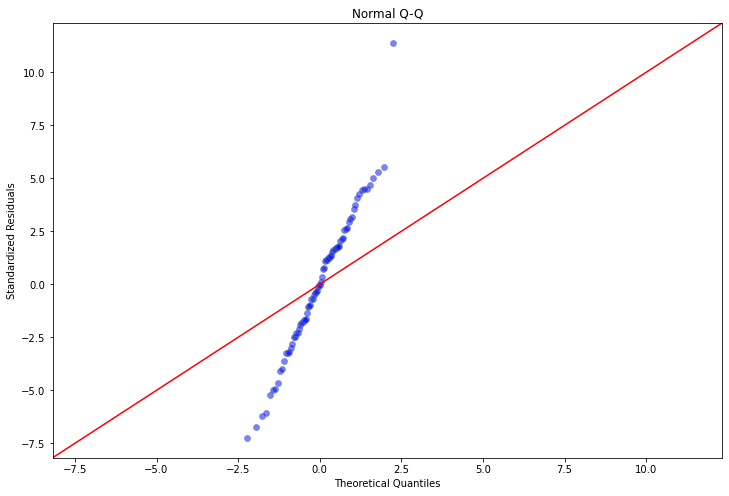

In [412]:
QQ = ProbPlot(resids)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

Something seems wrong with the Normal QQ-plot.